<a href="https://colab.research.google.com/github/adarsh-meher/BNP-Codes/blob/master/Bajaj_ICICI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np
import sklearn as sk
import scipy as sc
import statsmodels as sm
import datetime
import time
import numba

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as B
import matplotlib as mpl

In [55]:
%matplotlib inline
import os
os.getcwd()

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files

In [10]:
upload_file = files.upload()

Saving BAJAJELEC.csv to BAJAJELEC.csv


In [0]:
import io

In [0]:
data = pd.read_csv(io.BytesIO(upload_file['BAJAJELEC.csv']))

In [28]:
data.head()

,V2,V3,V5,V6,V7
0,BAJAJELEC,EQ,246.50,2,11/2/2015 9:07
1,BAJAJELEC,EQ,246.50,1,11/2/2015 9:07
2,BAJAJELEC,EQ,246.50,5,11/2/2015 9:07
3,BAJAJELEC,EQ,246.55,49,11/2/2015 9:15
4,BAJAJELEC,EQ,247.75,50,11/2/2015 9:15


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86522 entries, 0 to 86521
Data columns (total 5 columns):
V2    86522 non-null object
V3    86522 non-null object
V5    86522 non-null float64
V6    86522 non-null int64
V7    86522 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [0]:
cols_rename = {'V2': 'Stock_Name','V3' : 'Type','V5': 'Price','V6' : 'Volume' ,'V7' : 'Date'}
data.rename(columns = cols_rename,inplace = True)

In [0]:
data['Date'] = data['Date'].map(lambda x : datetime.datetime.strptime(x,"%m/%d/%Y %H:%M"))

In [0]:
data['Year'] = data['Date'].map(lambda x : x.year)
data['Month'] = data['Date'].map(lambda x : x.month)
data['Day'] = data['Date'].map(lambda x: x.day)
data['Hour'] = data['Date'].map(lambda x: x.hour)
data['Mins'] = data['Date'].map(lambda x : x.minute)

In [34]:
data.head()

,Stock_Name,Type,Price,Volume,Date,Year,Month,Day,Hour,Mins
0,BAJAJELEC,EQ,246.50,2,2015-11-02 09:07:00,2015,11,2,9,7
1,BAJAJELEC,EQ,246.50,1,2015-11-02 09:07:00,2015,11,2,9,7
2,BAJAJELEC,EQ,246.50,5,2015-11-02 09:07:00,2015,11,2,9,7
3,BAJAJELEC,EQ,246.55,49,2015-11-02 09:15:00,2015,11,2,9,15
4,BAJAJELEC,EQ,247.75,50,2015-11-02 09:15:00,2015,11,2,9,15


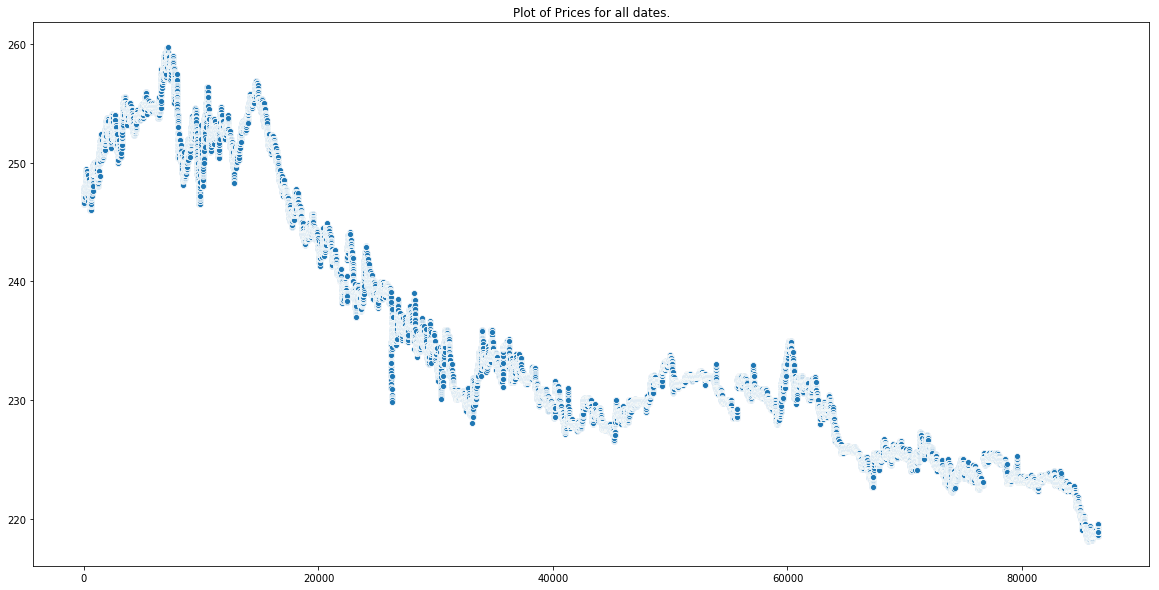

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize = (20,10))
sb.scatterplot(x = data.index.values,y = data['Price'].values)
plt.title('Plot of Prices for all dates.')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot of Prices for all dates.png')